<a href="https://colab.research.google.com/github/N00B-MA5TER/ML-Projects/blob/main/Medical_Insurance_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the Dependencies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

**Data Collection & Analysis**

In [2]:
# loading the data from csv file to a Pandas DataFrame
insurance_dataset = pd.read_csv('/content/insurance.csv')

In [3]:
# printing the first five rows
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# printing the last five rows
insurance_dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
# getting some basic info about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Categorical Features-**


*   **Sex**
*   **Smoker**
*   **Region**






In [6]:
# checking for empty values in columns
insurance_dataset.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [7]:
# number of rows and columns
insurance_dataset.shape

(1338, 7)

**Data Analysis**

In [8]:
# statistical analysis
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

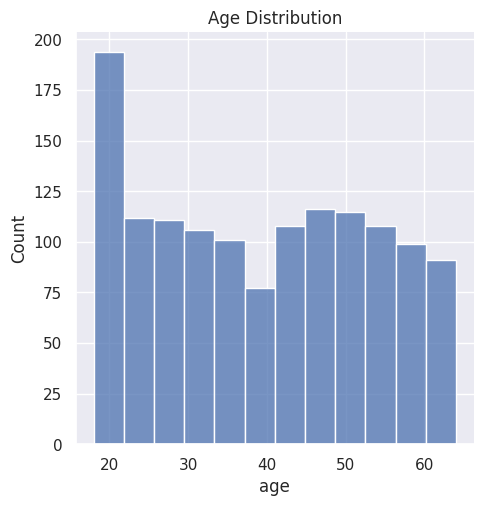

In [9]:
# distribution of age value
sns.set()
plt.figure(figsize = (6, 6))
sns.displot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

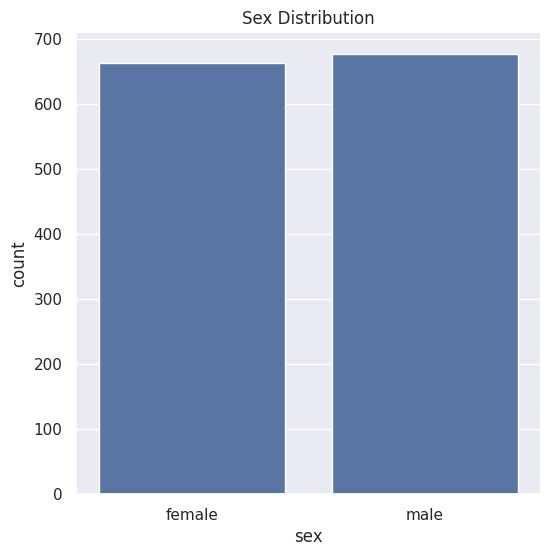

In [10]:
# gender column
plt.figure(figsize = (6, 6))
sns.countplot(x = 'sex', data = insurance_dataset)
plt.title("Sex Distribution")
plt.show

In [11]:
insurance_dataset['sex'].value_counts()

,count
sex,
male,676
female,662


<Figure size 600x600 with 0 Axes>

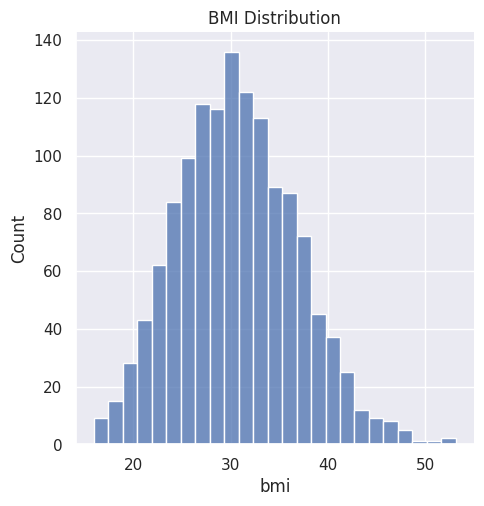

In [12]:
# bmi distribution
plt.figure(figsize = (6, 6))
sns.displot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

**Normal BMI range --> 18.5 to 24.9**

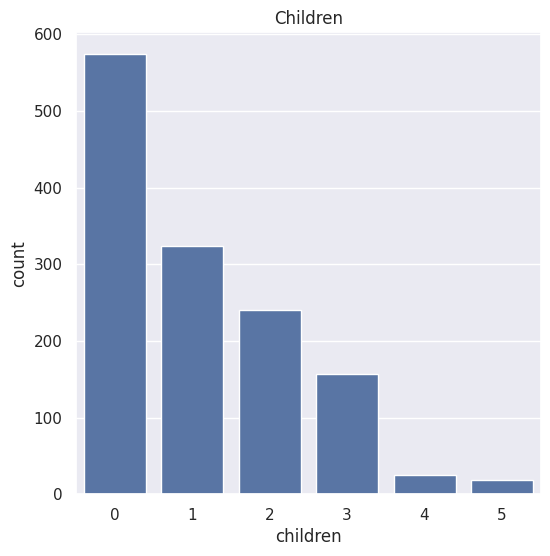

In [13]:
# children column
plt.figure(figsize = (6, 6))
sns.countplot(x = 'children', data = insurance_dataset)
plt.title('Children')
plt.show()

In [14]:
insurance_dataset['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


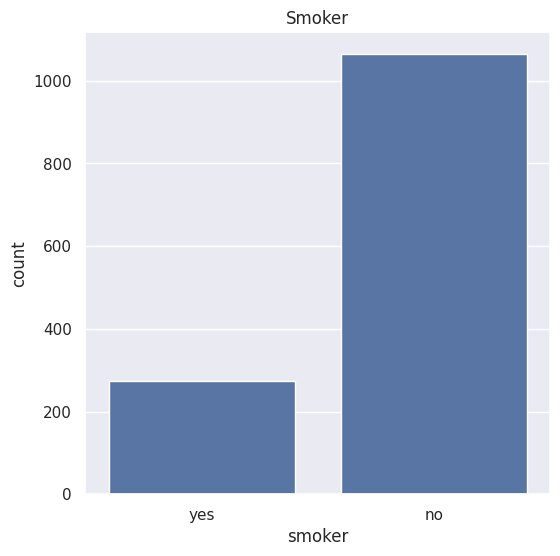

In [15]:
# smoker column
plt.figure(figsize = (6, 6))
sns.countplot(x = 'smoker', data = insurance_dataset)
plt.title('Smoker')
plt.show()

In [16]:
insurance_dataset['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


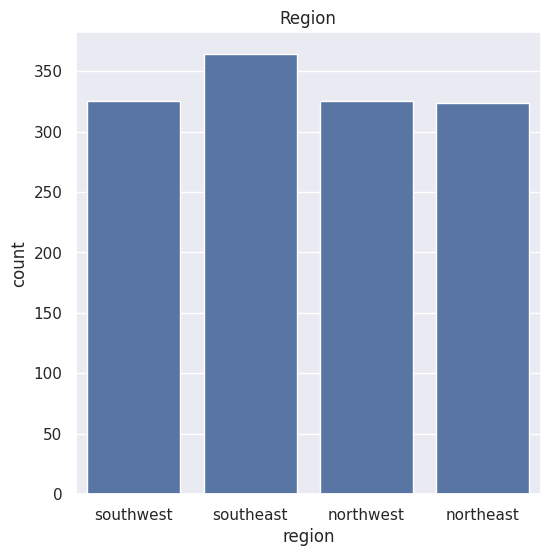

In [17]:
# Region column
plt.figure(figsize = (6, 6))
sns.countplot(x = 'region', data = insurance_dataset)
plt.title('Region')
plt.show()

In [18]:
insurance_dataset['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


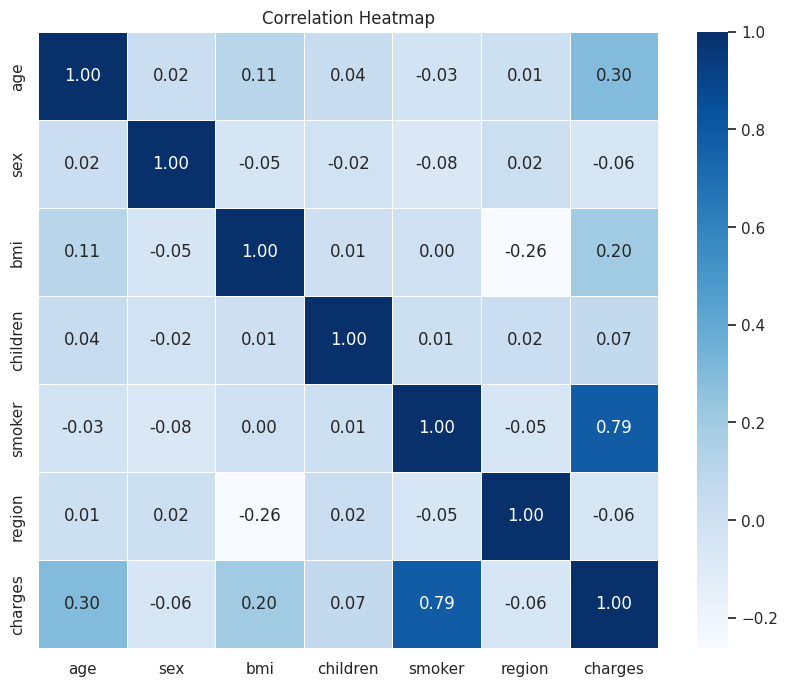

In [36]:
# correlation heatmap
corr = insurance_dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

<Figure size 600x600 with 0 Axes>

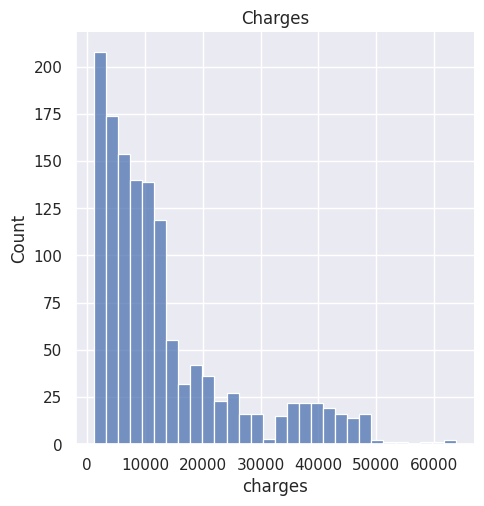

In [19]:
# distribution of charges
plt.figure(figsize = (6, 6))
sns.displot(insurance_dataset['charges'])
plt.title('Charges')
plt.show()

**Data Pre-Processing**

**Encoding the categorical features**

In [20]:
# encoding sex column
insurance_dataset.replace({'sex' : {'male' : 0, 'female' : 1}}, inplace = True)

# encoding smoker column
insurance_dataset.replace({'smoker' : {'yes' : 1, 'no' : 0}}, inplace = True)

# encoding region column
insurance_dataset.replace({'region' : {'southeast' : 0, 'southwest' : 1, 'northeast' : 2, 'northwest' : 3}}, inplace = True)

/tmp/ipython-input-2600467299.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'sex' : {'male' : 0, 'female' : 1}}, inplace = True)
/tmp/ipython-input-2600467299.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'smoker' : {'yes' : 1, 'no' : 0}}, inplace = True)
/tmp/ipython-input-2600467299.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=Fal

In [21]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


**Splitting the Features and Target**

In [22]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

In [23]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       1
1      18    0  33.770         1       0       0
2      28    0  33.000         3       0       0
3      33    0  22.705         0       0       3
4      32    0  28.880         0       0       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       3
1334   18    1  31.920         0       0       2
1335   18    1  36.850         0       0       0
1336   21    1  25.800         0       0       1
1337   61    1  29.070         0       1       3

[1338 rows x 6 columns]


In [24]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


**Splitting the data into Training data & Testing data**

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


**Model Training : Linear Regression**

In [27]:
#loading the linear regression model
regressor = LinearRegression()

In [28]:
regressor.fit(X_train, Y_train)

LinearRegression()

**Model Evaluation**

In [29]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [30]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error for training data : ", r2_train)

R squared error for training data :  0.751505643411174


In [31]:
# prediction on training data
test_data_prediction = regressor.predict(X_test)

In [32]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error for test data : ", r2_test)

R squared error for test data :  0.7447273869684076


**Comparing the performance of other models**

In [35]:
from sklearn.linear_model import Ridge, Lasso
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

# loading the Ridge Regression model
ridge_regressor = Ridge(alpha=1.0) # You can adjust alpha

# training the model
ridge_regressor.fit(X_train, Y_train)

# prediction on training data
training_data_prediction_ridge = ridge_regressor.predict(X_train)

# R squared value for training data
r2_train_ridge = metrics.r2_score(Y_train, training_data_prediction_ridge)
print("R squared error for training data (Ridge): ", r2_train_ridge)

# prediction on test data
test_data_prediction_ridge = ridge_regressor.predict(X_test)

# R squared value for test data
r2_test_ridge = metrics.r2_score(Y_test, test_data_prediction_ridge)
print("R squared error for test data (Ridge): ", r2_test_ridge)

print("\n--- XGBoost Regressor ---")
# loading the XGBoost Regressor model
xgb_regressor = XGBRegressor()

# training the model
xgb_regressor.fit(X_train, Y_train)

# prediction on training data
training_data_prediction_xgb = xgb_regressor.predict(X_train)

# R squared value for training data
r2_train_xgb = metrics.r2_score(Y_train, training_data_prediction_xgb)
print("R squared error for training data (XGBoost): ", r2_train_xgb)

# prediction on test data
test_data_prediction_xgb = xgb_regressor.predict(X_test)

# R squared value for test data
r2_test_xgb = metrics.r2_score(Y_test, test_data_prediction_xgb)
print("R squared error for test data (XGBoost): ", r2_test_xgb)


print("\n--- Polynomial Regression (Degree 2) ---")
# loading the Polynomial Regression model
poly_regressor = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# training the model
poly_regressor.fit(X_train, Y_train)

# prediction on training data
training_data_prediction_poly = poly_regressor.predict(X_train)

# R squared value for training data
r2_train_poly = metrics.r2_score(Y_train, training_data_prediction_poly)
print("R squared error for training data (Polynomial): ", r2_train_poly)

# prediction on test data
test_data_prediction_poly = poly_regressor.predict(X_test)

# R squared value for test data
r2_test_poly = metrics.r2_score(Y_test, test_data_prediction_poly)
print("R squared error for test data (Polynomial): ", r2_test_poly)

print("\n--- Gradient Boosting Regressor ---")
# loading the Gradient Boosting Regressor model
gbr_regressor = GradientBoostingRegressor()

# training the model
gbr_regressor.fit(X_train, Y_train)

# prediction on training data
training_data_prediction_gbr = gbr_regressor.predict(X_train)

# R squared value for training data
r2_train_gbr = metrics.r2_score(Y_train, training_data_prediction_gbr)
print("R squared error for training data (Gradient Boosting): ", r2_train_gbr)

# prediction on test data
test_data_prediction_gbr = gbr_regressor.predict(X_test)

# R squared value for test data
r2_test_gbr = metrics.r2_score(Y_test, test_data_prediction_gbr)
print("R squared error for test data (Gradient Boosting): ", r2_test_gbr)

print("\n--- AdaBoost Regressor ---")
# loading the AdaBoost Regressor model
abr_regressor = AdaBoostRegressor()

# training the model
abr_regressor.fit(X_train, Y_train)

# prediction on training data
training_data_prediction_abr = abr_regressor.predict(X_train)

# R squared value for training data
r2_train_abr = metrics.r2_score(Y_train, training_data_prediction_abr)
print("R squared error for training data (AdaBoost): ", r2_train_abr)

# prediction on test data
test_data_prediction_abr = abr_regressor.predict(X_test)

# R squared value for test data
r2_test_abr = metrics.r2_score(Y_test, test_data_prediction_abr)
print("R squared error for test data (AdaBoost): ", r2_test_abr)

print("\n--- Lasso Regressor ---")
# loading the Lasso Regression model
lasso_regressor = Lasso(alpha=1.0) # You can adjust alpha

# training the model
lasso_regressor.fit(X_train, Y_train)

# prediction on training data
training_data_prediction_lasso = lasso_regressor.predict(X_train)

# R squared value for training data
r2_train_lasso = metrics.r2_score(Y_train, training_data_prediction_lasso)
print("R squared error for training data (Lasso): ", r2_train_lasso)

# prediction on test data
test_data_prediction_lasso = lasso_regressor.predict(X_test)

# R squared value for test data
r2_test_lasso = metrics.r2_score(Y_test, test_data_prediction_lasso)
print("R squared error for test data (Lasso): ", r2_test_lasso)

R squared error for training data (Ridge):  0.7514846144151406
R squared error for test data (Ridge):  0.7448008334274916

--- XGBoost Regressor ---
R squared error for training data (XGBoost):  0.9967362176093564
R squared error for test data (XGBoost):  0.8144316777193814

--- Polynomial Regression (Degree 2) ---
R squared error for training data (Polynomial):  0.8431614000008123
R squared error for test data (Polynomial):  0.852147300648999

--- Gradient Boosting Regressor ---
R squared error for training data (Gradient Boosting):  0.9054241915138913
R squared error for test data (Gradient Boosting):  0.8679845518612449

--- AdaBoost Regressor ---
R squared error for training data (AdaBoost):  0.8222316781855761
R squared error for test data (AdaBoost):  0.8164597790273036

--- Lasso Regressor ---
R squared error for training data (Lasso):  0.7515055550686265
R squared error for test data (Lasso):  0.7447245444913575


**Building a Predictive System**

In [37]:
input_data = (37,0,29.83,2,0,2)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = gbr_regressor.predict(input_data_reshaped)
print("Amount to be insured : ", prediction[0], "$")

Amount to be insured :  7780.961256393562 $


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
